In [13]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

import sklearn

In [25]:
# Read CSV 
data = pd.read_csv('../../Resources/bio_vars_frame.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.dropna(axis = 0, how = 'any', inplace = True)
data.rename(columns={'bio_1': 'Annual Mean Temperature', 
                     'bio_2': 'Mean Diurnal Range (Mean of monthly (max temp - min temp))',
                     'bio_3': 'Isothermality',
                     'bio_4': 'Temperature Seasonality',
                     'bio_5': 'Max Temperature of Warmest Month',
                     'bio_6': 'Min Temperature of Coldest Month',
                     'bio_7': 'Temperature Annual Range',
                     'bio_8': 'Mean Temperature of Wettest Quarter',
                     'bio_9': 'Mean Temperature of Driest Quarter',
                     'bio_10': 'Mean Temperature of Warmest Quarter',
                     'bio_11': 'Mean Temperature of Coldest Quarter',
                     'bio_12': 'Annual Precipitation',
                     'bio_13': 'Precipitation of Wettest Month',
                     'bio_14': 'Precipitation of Driest Month',
                     'bio_15': 'Precipitation Seasonality (Coefficient of Variation)',
                     'bio_16': 'Precipitation of Wettest Quarter',
                     'bio_17': 'Precipitation of Driest Quarter',
                     'bio_18': 'Precipitation of Warmest Quarter',
                     'bio_19': 'Precipitation of Coldest Quarter',
                    }, inplace=True)
data.drop(['Min Temperature of Coldest Month', 'Precipitation of Wettest Quarter', 
           'Precipitation Seasonality (Coefficient of Variation)', 'Mean Temperature of Coldest Quarter',
           'Precipitation of Warmest Quarter', 'Max Temperature of Warmest Month',
           'Precipitation of Wettest Month', 'Annual Mean Temperature',
           'Precipitation of Driest Quarter', 'Mean Temperature of Warmest Quarter',
           'Precipitation of Driest Month', 'Isothermality'], axis = 1, inplace = True)

new_data = data[['Annual Precipitation','Precipitation of Coldest Quarter', 'Mean Temperature of Wettest Quarter']]

 
 
# data.head()
new_data.head()

,Annual Precipitation,Precipitation of Coldest Quarter,Mean Temperature of Wettest Quarter
0,2184.0,951.0,35.0
1,2196.0,961.0,34.0
2,2162.0,945.0,35.0
3,2144.0,937.0,35.0
4,2188.0,966.0,32.0


# Data Pre-Processing

In [26]:
X = new_data.drop('Annual Precipitation', axis=1)
y = new_data['Annual Precipitation']
print(X.shape, y.shape)

(1684856, 2) (1684856,)


# Model

In [27]:
# import train_test_split and split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate model
model = LinearRegression() 

In [29]:
# fit model to the training data
model.fit(X_train, y_train)
# calculate scores of training and testing data
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
# print scores 
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')


Training Score: 0.9145681269174308
Testing Score: 0.9146335659899212


In [30]:
coef = model.coef_
print(coef)

[ 1.84903732 -0.22811203]


In [31]:
training_prediction = model.predict(X_train)
testing_prediction = model.predict(X_test)


print(f'Training Probability: {training_prediction}')
print(f'Testing Probability: {testing_prediction}')

Training Probability: [240.83276473 225.02061145 219.29366963 ... 484.48445081 341.89376368
 318.59973893]
Testing Probability: [187.9083173  252.73203023 196.33762018 ... 212.85825064 223.93917568
 388.15468008]


Text(0.5,1,'Residual Plot')

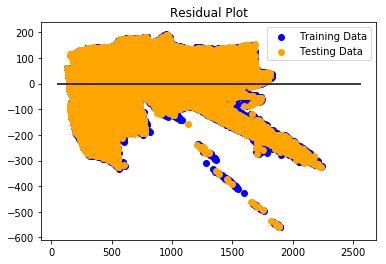

In [32]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color='blue', label='Training Data')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, color='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title('Residual Plot')

In [33]:
pd.DataFrame({"Prediction": testing_prediction, "Actual": y_test})

,Actual,Prediction
764786,192.0,187.908317
351495,259.0,252.732030
1210042,197.0,196.337620
1074720,1741.0,1756.742836
1589132,235.0,207.096326
1439785,290.0,423.251406
257830,475.0,426.995306
530628,313.0,258.987619
1558492,295.0,414.714697
1288260,339.0,252.264964
